# Biodiversity in National Parks

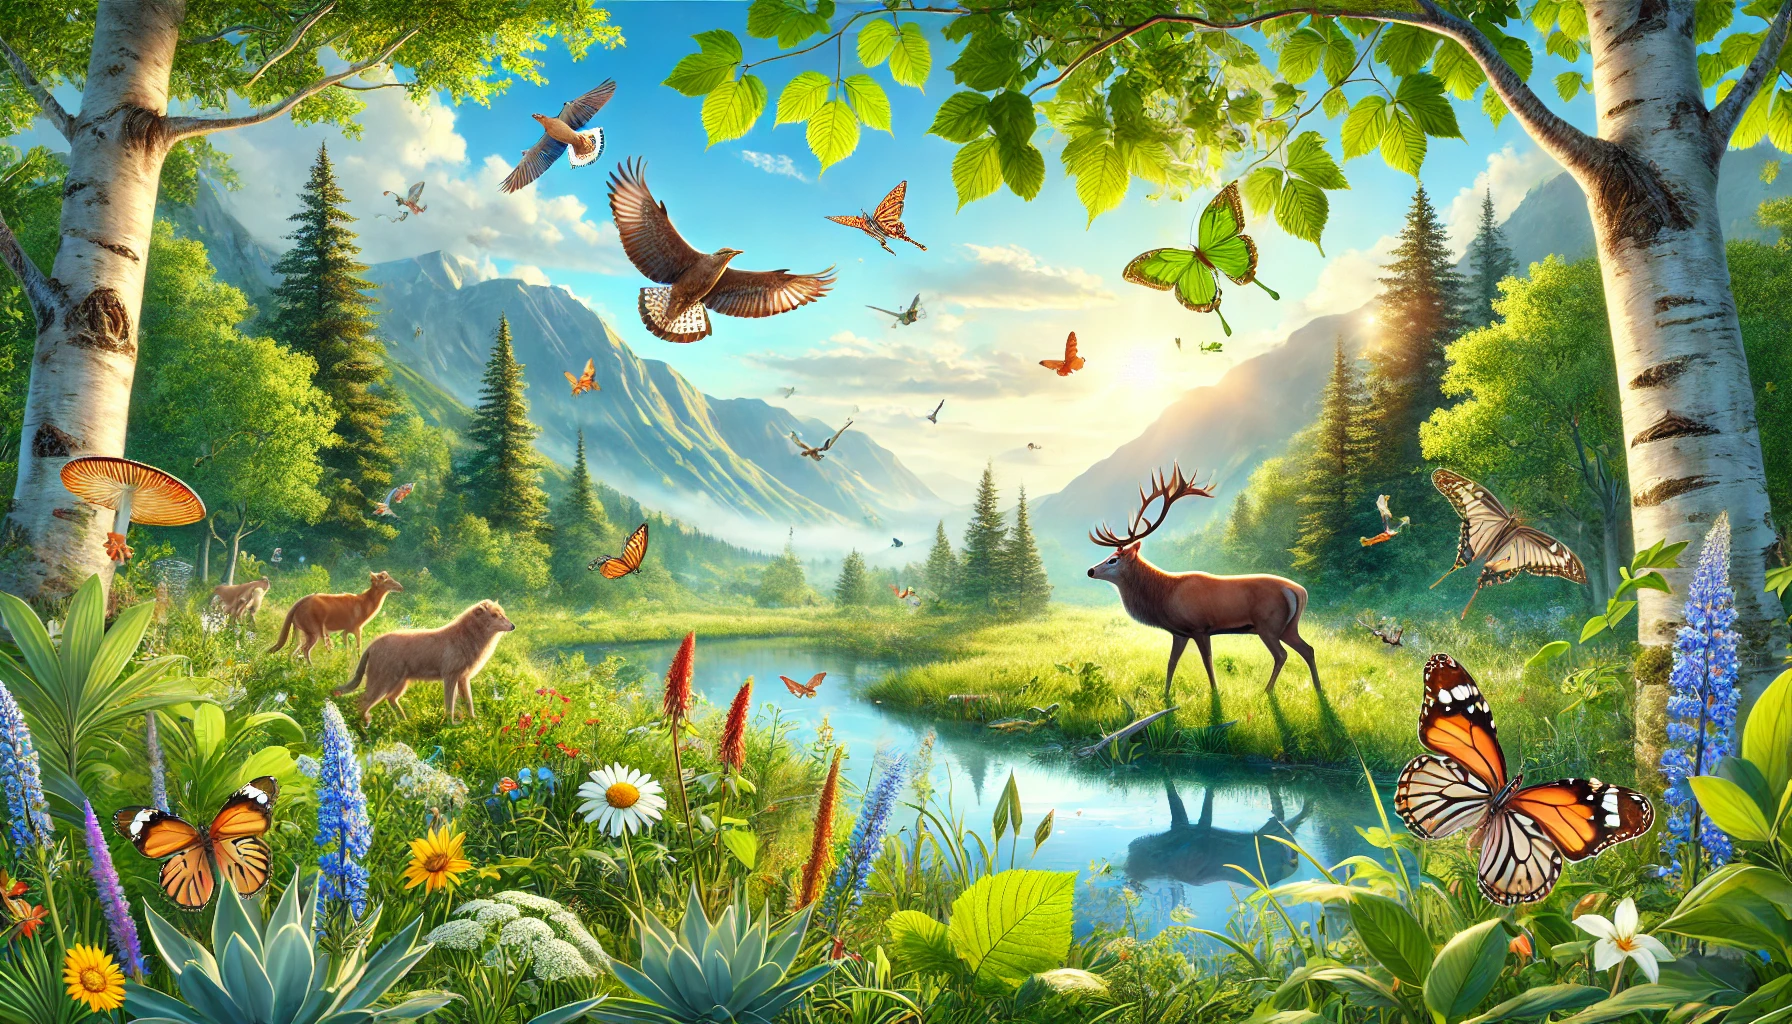

`Image generated by AI`

## Introduction

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks.

The main goal of this is to analyze biodiversity data around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?


## Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

## Preparation

In [1]:
# Importing initial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# Read csv files
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

#### Observations dataset

In [3]:
obs.head() # Display obs dataframe

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
obs.shape # Dataframe shape

(23296, 3)

In [5]:
obs.info() # Dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [6]:
obs.duplicated().sum() # Check for duplicates

15

In [7]:
obs.drop_duplicates(inplace=True) # Drop duplicates

In [8]:
obs['park_name'].unique() # How many different parks the data contemplates?

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

#### Species dataset

In [9]:
species.head() # Display species df

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [10]:
species.shape # Dataframe shape

(5824, 4)

In [11]:
species.info() # Dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [12]:
species.duplicated().sum() #Check for duplicates

0

In [13]:
species['conservation_status'].unique() #How many categories of conservation our dataset has?

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [14]:
species = species.fillna('Least Concern') #Fill null values

In [15]:
species.info() # Check dataframe info again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


In [16]:
species_cat = species['category'].unique() # How many categories of species our dataset has?
species_cat

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [17]:
print('Number of unique species in observations df: ' + str(obs['scientific_name'].nunique()) +
      '\nNumber of unique species in species_info df: ' + str(species['scientific_name'].nunique()))

Number of unique species in observations df: 5541
Number of unique species in species_info df: 5541


In [18]:
species['conservation_status'].value_counts()

Least Concern         5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

## Distribution of conservation status among categories

To start this study, it's important to look into the distribution of our data. In this case, it will be analyzed the distribution of our species dataset and how many different species there are in each conservation status. That allows to understand better the data for each species category.

In [19]:
indexes = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0)]

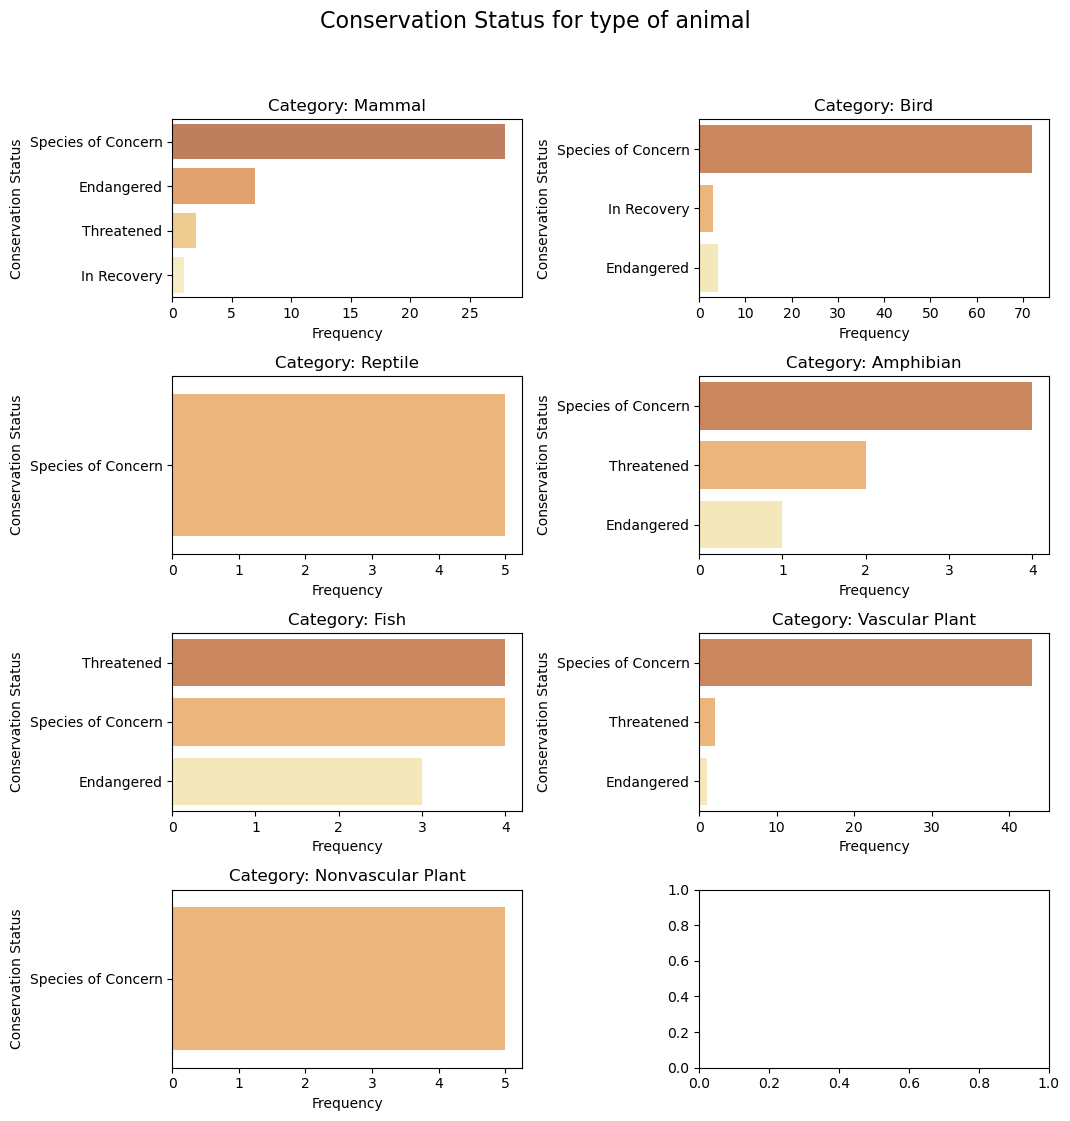

In [20]:
# Ploting distributions for each category
fig, axs = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Conservation Status for type of animal', fontsize=16)

for index, animal in zip(indexes, species_cat):
    ax = axs[index]
    data = species[(species['category']==animal) & (species['conservation_status']!='Least Concern')]
    sns.countplot(data=data, y='conservation_status', palette='YlOrBr_r', alpha=0.7, hue='conservation_status', ax=ax)
    ax.set_title(f'Category: {animal}')
    ax.set_ylabel('Conservation Status')
    ax.set_xlabel('Frequency')
    
plt.tight_layout(rect=(0.05, 0.05, 0.95, 0.95))
plt.show()

This initial visualization provides a critical overview of the conservation statuses of various animal and plant categories within the studied national parks. The data reveals a concerning trend of "Species of Concern" being prevalent across all categories, signaling potential widespread ecological pressures. Other key observations that can be made concern:

* **Mammals and Birds:** These categories show the highest frequencies of "Species of Concern," suggesting a need for focused conservation efforts. Notably, there's a significant number of "In Recovery" birds, indicating potential success in past conservation initiatives.
* **Reptiles, Amphibians, and Fish:** These groups exhibit a relatively lower number of species listed in each conservation status, with "Species of Concern" being the most prevalent.
* **Vascular and Nonvascular Plants:** Similarly, these categories primarily show "Species of Concern," highlighting potential threats to plant biodiversity.
* **Endangered Species:** The presence of "Endangered" species across multiple categories (particularly mammals and birds) underscores the urgency for immediate conservation actions. 

Overall, this analysis reveals the diverse conservation needs across different species categories within the national park. Subsequent sections of this report will build upon these findings with further analyses on endangered species.

## Likelyhood of being endangered

In [21]:
# Creating a cross dataframe with category and conservation status
cross = pd.crosstab(species['category'], species['conservation_status'])
cross['Total'] = cross.sum(axis=1)                                                 # Total Column
cross['Proportion_Endangered%'] = round(100*cross['Endangered']/cross['Total'], 2) # Proportion Column
cross = cross.sort_values('Proportion_Endangered%', ascending=False)               # Sort the dataframe
cross

conservation_status,Endangered,In Recovery,Least Concern,Species of Concern,Threatened,Total,Proportion_Endangered%
category,,,,,,,
Mammal,7,1,176,28,2,214,3.27
Fish,3,0,116,4,4,127,2.36
Amphibian,1,0,73,4,2,80,1.25
Bird,4,3,442,72,0,521,0.77
Vascular Plant,1,0,4424,43,2,4470,0.02
Nonvascular Plant,0,0,328,5,0,333,0.00
Reptile,0,0,74,5,0,79,0.00


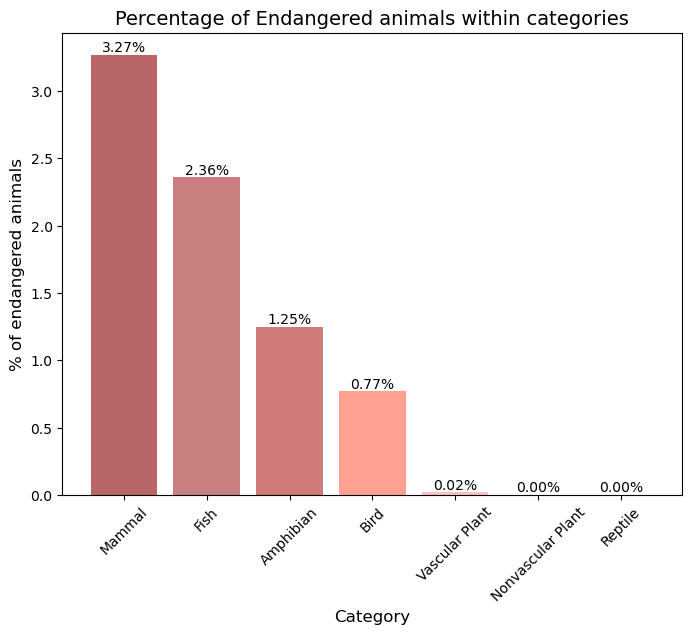

In [22]:
# Plotting Proportion_Endangered% column
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(cross))
colors = ['#8B0000', '#A52A2A', '#B22222', '#FF6347', '#FF9999', '#FF7F7F', '#FFA07A']

graph = ax.bar(data=cross, x=x, height='Proportion_Endangered%', color=colors, alpha=0.6)
ax.set_title('Percentage of Endangered animals within categories', fontsize=14)
ax.set_ylabel('% of endangered animals', fontsize=12)
ax.set_xlabel('Category', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(cross.index)
plt.xticks(rotation=45)
ax.bar_label(graph, fmt='%.2f%%')
plt.show()

In [23]:
# Creating a dataframe for a waterfall chart
waterfall_df = pd.DataFrame(cross['Endangered']).sort_values(by='Endangered', ascending=False).reset_index()
new_line = pd.DataFrame({'category': ['Total'], 'Endangered': [waterfall_df['Endangered'].sum()]})           # Create Row for Total
waterfall_df = pd.concat([waterfall_df, new_line], ignore_index=True)                                        # Append the Total row in waterfall_df
waterfall_df['Running_Total'] = waterfall_df['Endangered'].cumsum()                                          # Calculate the Running total
waterfall_df['Shifted_Total'] = waterfall_df['Running_Total'].shift(1).fillna(0)                             # Shift the Running total by 1
waterfall_df['Position'] = waterfall_df.apply(lambda row: 0 if row['category'] == 'Total' else row['Shifted_Total'], axis=1) #Create bars Position column

In [24]:
waterfall_df

,category,Endangered,Running_Total,Shifted_Total,Position
0,Mammal,7,7,0.0,0.0
1,Bird,4,11,7.0,7.0
2,Fish,3,14,11.0,11.0
3,Amphibian,1,15,14.0,14.0
4,Vascular Plant,1,16,15.0,15.0
5,Nonvascular Plant,0,16,16.0,16.0
6,Reptile,0,16,16.0,16.0
7,Total,16,32,16.0,0.0


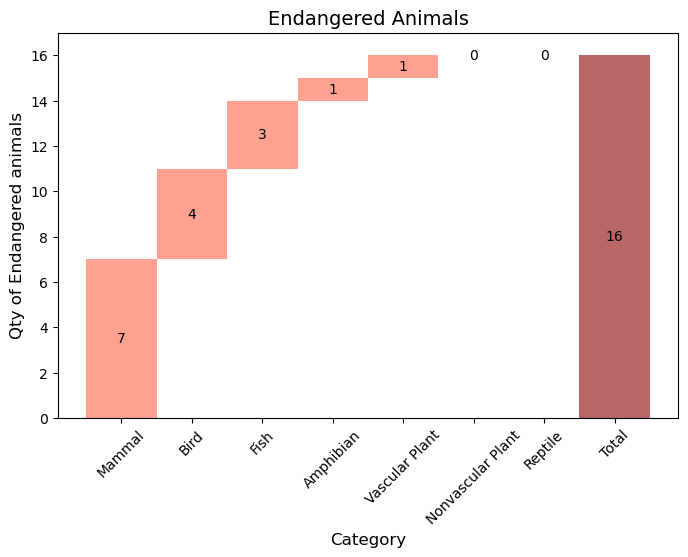

In [25]:
# Plot the waterfall chart
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(waterfall_df))
colors = ['#8B0000' if x == 'Total' else '#FF6347' for x in waterfall_df['category']]

waterfall_chart = ax.bar(x, waterfall_df['Endangered'], bottom=waterfall_df['Position'], color=colors, alpha=0.6, width=1.0)

ax.set_title('Endangered Animals', fontsize=14)
ax.set_ylabel('Qty of Endangered animals', fontsize=12)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylim(0, 17)
ax.set_xticks(x)
ax.set_xticklabels(waterfall_df['category'], rotation=45)
ax.bar_label(waterfall_chart, label_type = 'center')

plt.show()

The analysis of both graphs above allows us to look into the prevalence of endangered animals across various taxonomic categories, using both percentage and absolute count data for a comprehensive understanding.

**Key Observations:**

* **Mammals: High Percentage and Dominant Count:** As shown in the first plot, mammals exhibit the highest percentage of endangered species (3.27%). This is further reinforced by the second plot, which reveals a significant absolute count of 7 endangered mammal species, contributing to the highest total of 16 endangered animals across all categories.
* **Birds: Low Percentage, but Significant Counts:** Birds, with a lower percentage of 0.77%, show the second highest count with 4 endangered species. This highlights a significant impact, despite the lower relative percentage.
* **Fish: Moderate Percentage, Notable Count:** Fish, with a moderate percentage of 2.36%, contribute a count of 3 endangered species.
* **Amphibians: Low Percentage, Minimal Count:** Amphibians, with a percentage of 1.25%, show a count of 1 endangered species.
* **Plants and Reptiles: Low Percentages, Minimal Counts:** Vascular and nonvascular plants, along with reptiles, show extremely low percentages of endangered species and minimal absolute counts. This suggests different conservation priorities for these groups, potentially focusing on habitat preservation or specific threat mitigation.

The combined analysis of both percentage and absolute count data provides a more nuanced understanding of the endangerment landscape within the national park. While percentage data highlights relative vulnerability, absolute counts underscore the real-world impact and scale of conservation needs. Mammals, in particular, emerge as a critical focus for conservation efforts, given their high percentage of endangered species and significant absolute count.

## Significance between species and conservation status variables

This section of the study explores the statistical significance of the relationship between species categories and their respective conservation statuses. Understanding this relationship is crucial for several reasons:

Determining if certain species categories are disproportionately represented in higher-risk conservation statuses (e.g., Endangered, Threatened) allows for targeted conservation efforts. Also, significant associations may reveal underlying ecological factors or human pressures that affect various species groups in different ways.

To assess the significance of these relationships, we employ the chi-square (χ²) test. This statistical test is appropriate for analyzing the association between two categorical variables, in this case, species category and conservation status. The chi-square test will determine if the observed distribution of conservation statuses across species categories deviates significantly from what would be expected by chance. The results of this analysis will provide valuable insights into the interdependencies between species categories and conservation statuses.

### Contingency table

In [26]:
# Creating a proportions contingency table
freq_contingency = cross[['Endangered', 'In Recovery', 'Least Concern', 'Species of Concern', 'Threatened']]
prop_contingency = freq_contingency / len(obs)

In [27]:
prop_contingency

conservation_status,Endangered,In Recovery,Least Concern,Species of Concern,Threatened
category,,,,,
Mammal,0.000301,0.000043,0.007560,0.001203,0.000086
Fish,0.000129,0.000000,0.004983,0.000172,0.000172
Amphibian,0.000043,0.000000,0.003136,0.000172,0.000086
Bird,0.000172,0.000129,0.018985,0.003093,0.000000
Vascular Plant,0.000043,0.000000,0.190026,0.001847,0.000086
Nonvascular Plant,0.000000,0.000000,0.014089,0.000215,0.000000
Reptile,0.000000,0.000000,0.003179,0.000215,0.000000


In [28]:
# Printing the contingency marginal proportions
category_marginals = prop_contingency.sum(axis=1)
conservation_status_marginals = prop_contingency.sum(axis=0)

In [29]:
print(category_marginals)
print('\n---------------\n')
print(conservation_status_marginals)

category
Mammal               0.009192
Fish                 0.005455
Amphibian            0.003436
Bird                 0.022379
Vascular Plant       0.192002
Nonvascular Plant    0.014304
Reptile              0.003393
dtype: float64

---------------

conservation_status
Endangered            0.000687
In Recovery           0.000172
Least Concern         0.241957
Species of Concern    0.006916
Threatened            0.000430
dtype: float64


### Chi² test (Verify whether te association between variables is significant)

In [30]:
chi2, pval, dof, expected = chi2_contingency(freq_contingency)

In [31]:
# Expected contingency table, according to the chi² test
expected_contingency = pd.DataFrame(expected,
                                    index=freq_contingency.index,
                                    columns=freq_contingency.columns)

In [32]:
expected_contingency

conservation_status,Endangered,In Recovery,Least Concern,Species of Concern,Threatened
category,,,,,
Mammal,0.587912,0.146978,206.981799,5.915865,0.367445
Fish,0.348901,0.087225,122.834993,3.510817,0.218063
Amphibian,0.219780,0.054945,77.376374,2.211538,0.137363
Bird,1.431319,0.357830,503.913633,14.402644,0.894574
Vascular Plant,12.280220,3.070055,4323.404876,123.569712,7.675137
Nonvascular Plant,0.914835,0.228709,322.079155,9.205529,0.571772
Reptile,0.217033,0.054258,76.409169,2.183894,0.135646


### Standarized Residuals (Identify which cells drive the association)

In [33]:
std_residuals = (freq_contingency - expected_contingency) / np.sqrt(expected_contingency)
std_residuals

conservation_status,Endangered,In Recovery,Least Concern,Species of Concern,Threatened
category,,,,,
Mammal,8.362638,2.225021,-2.153479,9.079695,2.693219
Fish,4.488226,-0.295339,-0.616704,0.261076,8.098845
Amphibian,1.664266,-0.234404,-0.497520,1.202631,5.025670
Bird,2.147050,4.416952,-2.758089,15.176843,-0.945819
Vascular Plant,-3.218952,-1.752157,1.529903,-7.247960,-2.048487
Nonvascular Plant,-0.956470,-0.478235,0.329915,-1.386105,-0.756156
Reptile,-0.465868,-0.232934,-0.275610,1.905606,-0.368301


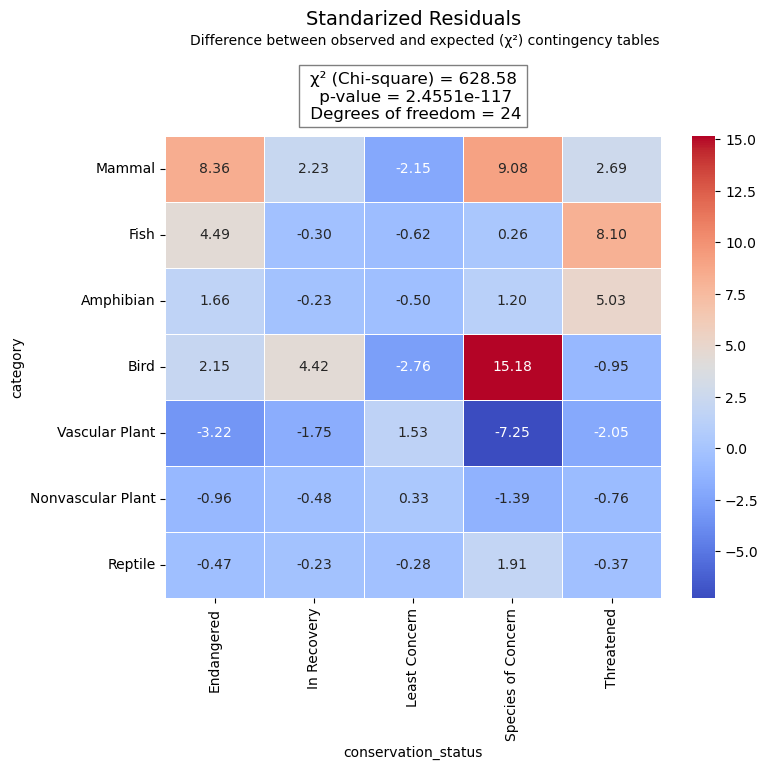

In [34]:
# Plot standarized residuals and Chi² test metrics
plt.figure(figsize=(8, 6))
sns.heatmap(std_residuals, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

#Displaying other test measures in the plot
text = f"χ² (Chi-square) = {chi2:.2f}\n p-value = {pval:.4e}\n Degrees of freedom = {dof}"
plt.text(2.5, -0.6, text, fontsize=12, color="black", ha="center", va="center",
         bbox=dict(facecolor="white", alpha=0.5, edgecolor="black"))

plt.title("Standarized Residuals", fontsize=14, pad=80)
plt.suptitle("Difference between observed and expected (χ²) contingency tables", x = 0.45, y= 1.05, fontsize=10)
plt.show()

According to the Chi-square critical values table, at a 0.05 significance level and 24 degrees of freedom, the critical χ² (Chi-square) value is 36.42.

Our test resulted in a χ² of 628.58, indicating a statistically significant association between the categories and conservation_status variables.

As for the standarized residual analysis, here are the keyfindings:

- **Birds (Least Concern)** show the most substantial positive residual (**15.18**), meaning this category appears **significantly more often** in this status than expected.

- **Mammals (Endangered & Vulnerable)** have high positive residuals (**8.36** and **9.08**), suggesting that mammals are disproportionately affected in these categories.

- **Fish (Threatened)** also shows a strong positive residual (**8.10**), implying that fish species are overrepresented in the threatened category.

- **Vascular Plants (Vulnerable & Least Concern)** have **strong negative residuals** (-7.25 and -3.22), meaning they are significantly **underrepresented** in these categories.

### Cramér’s V (Measure effect size)

Effect size general rule:

V < 0.1 → Very weak

0.1 ≤ V < 0.3 → Weak

0.3 ≤ V < 0.5 → Moderate

V ≥ 0.5 → Strong

In [35]:
n = np.sum(freq_contingency.values)  # Total number of observations

cramers_v = np.sqrt(chi2 / (n * min(freq_contingency.shape[0] - 1, freq_contingency.shape[1] - 1)))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.1643


In conclusion, a Chi² test of independence was conducted to examine the relationship between **Categories** and **Conservation Status**.

The results were **significant** (χ² = 628.58, p = 2.455e-117), indicating a relationship between the two variables.

A Cramér’s V of 0.1643 suggests the strength of this association is **weak**.

Standardized residuals show that birds are more likely to be in Least Concern, while mammals and fish are overrepresented in endangered and threatened categories. Conversely, vascular plants appear less affected by conservation concerns than expected.

These insights highlight taxonomic disparities in conservation status, which could guide targeted conservation strategies.

## Most spotted species at each park

Following the investigation into the statistical relationships between species categories and their conservation statuses, which revealed potential vulnerabilities and associations, we now shift our focus to the distribution and abundance of species within the national parks. While the chi-square analysis highlighted which species groups are facing heightened conservation concerns, understanding the most observed species provides a complementary perspective on the ecological dynamics of these parks. Identifying dominant species can shed light on habitat preferences, resource availability, and overall ecosystem health. Moreover, it can help contextualize the conservation status findings by revealing whether endangered species are also among the least observed, or if dominant species are relatively stable.

In [46]:
# Merge obs and species dfs
merged_df = obs.merge(species, how='inner', on='scientific_name')
merged_df = merged_df[['category', 'scientific_name', 'common_names', 'conservation_status', 'park_name', 'observations']]
merged_df

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Vascular Plant,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Least Concern,Great Smoky Mountains National Park,68
1,Vascular Plant,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Least Concern,Yosemite National Park,148
2,Vascular Plant,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Least Concern,Yellowstone National Park,247
3,Vascular Plant,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Least Concern,Bryce National Park,104
4,Mammal,Neovison vison,American Mink,Least Concern,Great Smoky Mountains National Park,77
...,...,...,...,...,...,...
25596,Mammal,Gulo gulo,Wolverine,Least Concern,Yosemite National Park,157
25597,Vascular Plant,Dichanthelium depauperatum,"Green Panic-Grass, Panic Grass",Least Concern,Great Smoky Mountains National Park,88
25598,Vascular Plant,Dichanthelium depauperatum,"Green Panic-Grass, Panic Grass",Least Concern,Bryce National Park,80
25599,Vascular Plant,Dichanthelium depauperatum,"Green Panic-Grass, Panic Grass",Least Concern,Yellowstone National Park,255


In [47]:
# Grouping and sorting by park and category
grouped = merged_df.groupby(['park_name', 'category', 'common_names', 'conservation_status'])['observations'].sum().reset_index()
grouped = grouped.sort_values(by=['park_name', 'observations'], ascending=[True, False])

In [48]:
grouped

,park_name,category,common_names,conservation_status,observations
968,Bryce National Park,Nonvascular Plant,Dicranum Moss,Least Concern,707
930,Bryce National Park,Nonvascular Plant,Brachythecium Moss,Least Concern,672
937,Bryce National Park,Nonvascular Plant,Bryum Moss,Least Concern,637
4099,Bryce National Park,Vascular Plant,Panic Grass,Least Concern,619
1107,Bryce National Park,Nonvascular Plant,Sphagnum,Least Concern,547
...,...,...,...,...,...
17278,Yosemite National Park,Mammal,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered,36
17331,Yosemite National Park,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,36
17154,Yosemite National Park,Fish,June Sucker,Endangered,35
17386,Yosemite National Park,Mammal,Red Wolf,Endangered,34


In [49]:
# Selecting only the top 5 species observed per park
top5_per_park = grouped.groupby('park_name').head(5)
top5_per_park

,park_name,category,common_names,conservation_status,observations
968,Bryce National Park,Nonvascular Plant,Dicranum Moss,Least Concern,707
930,Bryce National Park,Nonvascular Plant,Brachythecium Moss,Least Concern,672
937,Bryce National Park,Nonvascular Plant,Bryum Moss,Least Concern,637
4099,Bryce National Park,Vascular Plant,Panic Grass,Least Concern,619
1107,Bryce National Park,Nonvascular Plant,Sphagnum,Least Concern,547
6483,Great Smoky Mountains National Park,Nonvascular Plant,Dicranum Moss,Least Concern,544
6445,Great Smoky Mountains National Park,Nonvascular Plant,Brachythecium Moss,Least Concern,499
9614,Great Smoky Mountains National Park,Vascular Plant,Panic Grass,Least Concern,489
6452,Great Smoky Mountains National Park,Nonvascular Plant,Bryum Moss,Least Concern,469
6622,Great Smoky Mountains National Park,Nonvascular Plant,Sphagnum,Least Concern,434


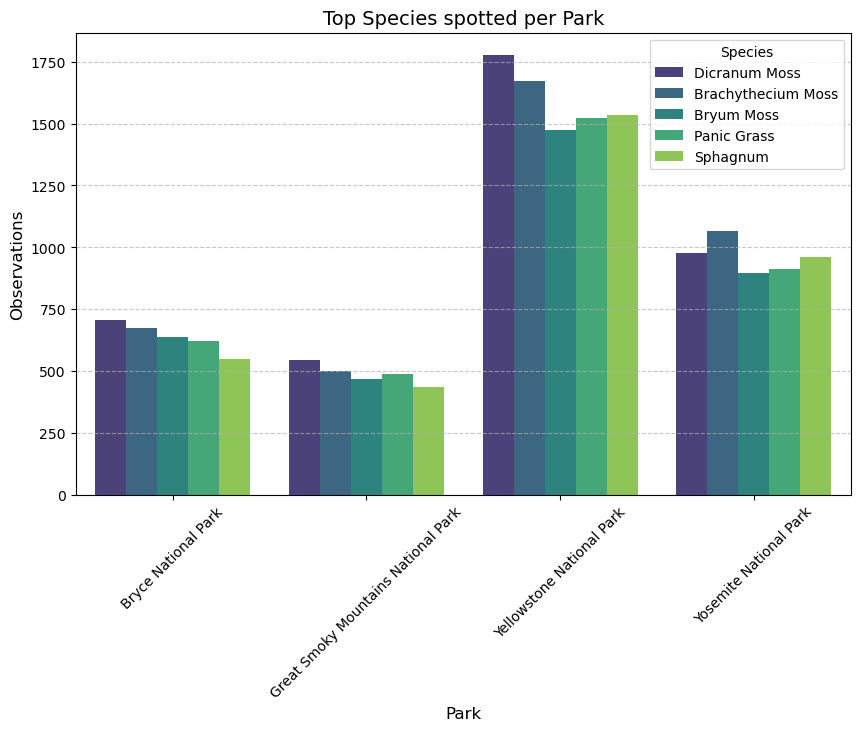

In [50]:
# Plotting the most observed species
plt.figure(figsize=(10, 6))

sns.barplot(data=top5_per_park, x="park_name", y="observations", hue="common_names", palette="viridis")

plt.title("Top Species spotted per Park", fontsize=14)
plt.xlabel("Park", fontsize=12)
plt.ylabel("Observations", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Species")
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

The first plot reveals that plants, particularly *Dicranum Moss* and *Brachythecium Moss*, are consistently among the most observed species in all parks. Yellowstone National Park shows an exceptionally high observation count for these species.

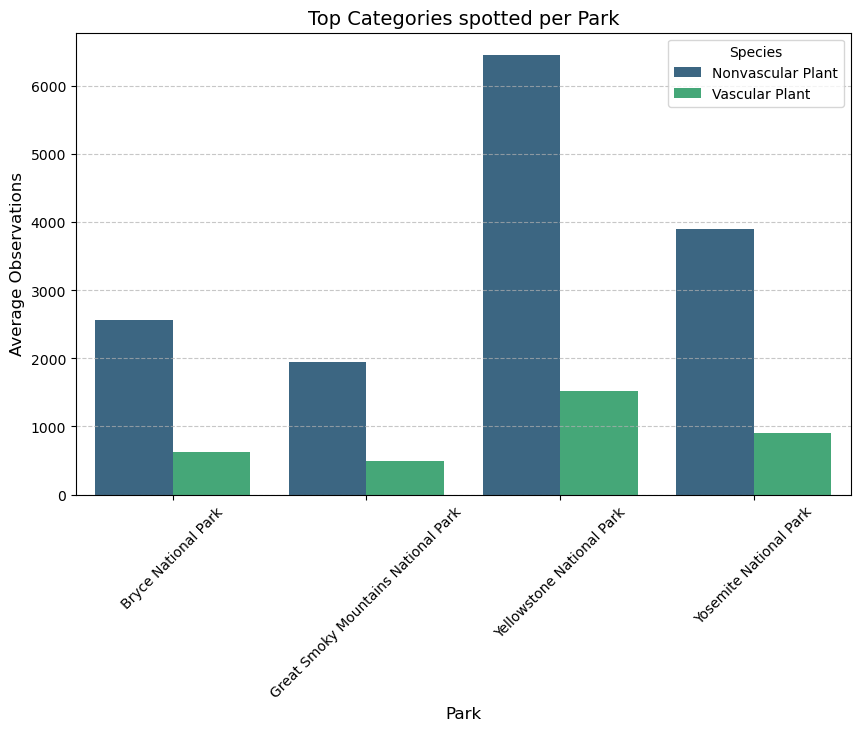

In [51]:
# Plotting the most observed categories
plt.figure(figsize=(10, 6))

sns.barplot(data=top5_per_park, x="park_name", y="observations", hue="category", estimator=sum, errorbar=None, palette="viridis")

plt.title("Top Categories spotted per Park", fontsize=14)
plt.xlabel("Park", fontsize=12)
plt.ylabel("Average Observations", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Species")
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

This second plot reinforces the high presence of plants among the most observed categories, showing a significant dominance of Nonvascular Plants over Vascular Plants in all parks. Yellowstone, again, shows an extreme difference.

It's possible to conclude that plants are the most spotted species due to it's abundance in national parks, if compared to animals. Plants, particularly mosses and other nonvasculars, might be genuinely more abundant in these park ecosystems. They could form the base of the food web or play crucial roles in the park's ecology. Also, plants are stationary, making them easier to count and record. Animal observations might be more challenging due to their mobility, elusive behavior, or the need for specialized tracking techniques.

To better understand the fauna of these parks, and considering the relevance of animals for the analysis, we will remove the plant observations from the dataset.

In [52]:
# Removing Plant Categories from the grpuped df
grouped_only_animals = grouped[~grouped['category'].isin(['Nonvascular Plant', 'Vascular Plant'])]
grouped_only_animals

,park_name,category,common_names,conservation_status,observations
817,Bryce National Park,Mammal,Mountain Lion,Least Concern,376
224,Bryce National Park,Bird,"Common Pigeon, Rock Dove, Rock Pigeon",Least Concern,339
438,Bryce National Park,Bird,Rock Dove,Least Concern,339
439,Bryce National Park,Bird,Rock Pigeon,Least Concern,339
869,Bryce National Park,Mammal,Uinta Chipmunk,Least Concern,334
...,...,...,...,...,...
17278,Yosemite National Park,Mammal,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered,36
17331,Yosemite National Park,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,36
17154,Yosemite National Park,Fish,June Sucker,Endangered,35
17386,Yosemite National Park,Mammal,Red Wolf,Endangered,34


In [53]:
# Selecting only the most observed animals per park
top3_animals_per_park = grouped_only_animals.groupby('park_name').head(3)
top3_animals_per_park

,park_name,category,common_names,conservation_status,observations
817,Bryce National Park,Mammal,Mountain Lion,Least Concern,376
224,Bryce National Park,Bird,"Common Pigeon, Rock Dove, Rock Pigeon",Least Concern,339
438,Bryce National Park,Bird,Rock Dove,Least Concern,339
6332,Great Smoky Mountains National Park,Mammal,Mountain Lion,Least Concern,311
6384,Great Smoky Mountains National Park,Mammal,Uinta Chipmunk,Least Concern,261
5768,Great Smoky Mountains National Park,Bird,Eurasian Collared Dove,Least Concern,256
11847,Yellowstone National Park,Mammal,Mountain Lion,Least Concern,1037
11899,Yellowstone National Park,Mammal,Uinta Chipmunk,Least Concern,767
11201,Yellowstone National Park,Bird,Brewster's Warbler,Least Concern,760
17389,Yosemite National Park,Mammal,River Otter,Least Concern,555


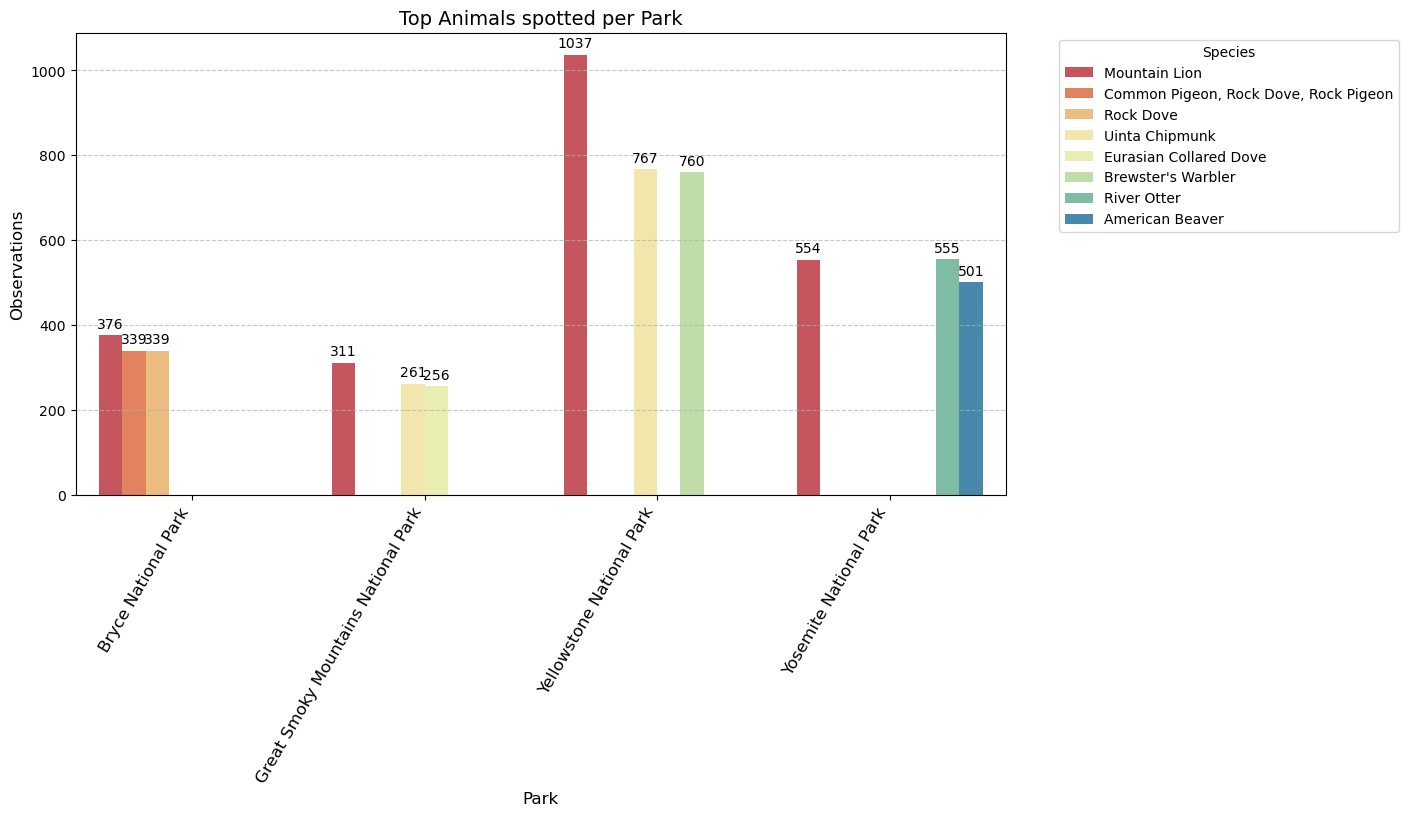

In [54]:
# Plotting most observed animals per park
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=top3_animals_per_park, x="park_name", y="observations", hue="common_names", palette="Spectral")

plt.title("Top Animals spotted per Park", fontsize=14)
plt.xlabel("Park", fontsize=12)
plt.ylabel("Observations", fontsize=12)
plt.xticks(rotation=60, ha="right", fontsize=12)
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=10, padding=3)

plt.show()

When focusing only on animals, Mountain Lions are notably dominant in Yellowstone, with high observation counts. Also, they are commonly seen in all the four parks studied. Other frequently observed animals include Common Pigeons and Rock Doves.

Besides the Mountain Lions, it's possible to observe that each park has it's own diverse set of observed animal species. Some examples:

* **Bryce National Park** shows a relatively even distribution among its top observed animals, with spottings of Common Pigeons and Rock Doves. This indicates a strong presence of these bird species within the park, potentially due to available food sources or suitable nesting habitats.
    
* **Yosemite National Park** demonstrates a more diverse set of observed animal species, with relatively close observation counts for River Otters and American Beavers. This suggests a varied animal community within the park, with both aquatic and semi-aquatic species being prominent.

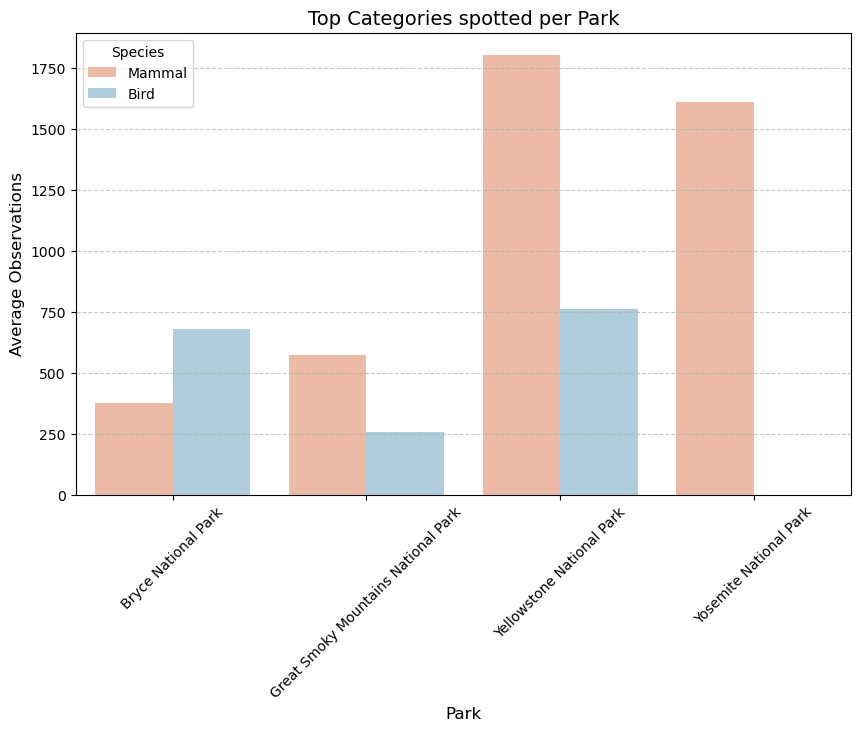

In [55]:
# Plotting top animal categories
plt.figure(figsize=(10, 6))

sns.barplot(data=top3_animals_per_park, x="park_name", y="observations", hue="category", estimator=sum, errorbar=None, palette="RdBu")

plt.title("Top Categories spotted per Park", fontsize=14)
plt.xlabel("Park", fontsize=12)
plt.ylabel("Average Observations", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Species")
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

It's clear that Mammals and Birds are the dominant animal categories. Mammals show a higher observation rate than birds in all parks, except for Bryce Canyon. Yellowstone maintains the highest observation rate of Mammals.

Furthermore, according to both top5_per_park and top3_animals_per_park dataframes, all the top observed species were classified as "Least Concern" in terms of their conservation status.

## Conclusion

This study examined the biodiversity patterns across four national parks, with a focus on conservation status, species distribution, and abundance. The analysis revealed key findings that are important for park management and conservation strategies. Notably, the chi-square analysis showed significant connections between species groups and their conservation statuses, indicating potential vulnerabilities, especially for mammals and birds. This highlights the need for focused conservation efforts to reduce threats to these groups. Analyzing species abundance and distribution, a dominance of nonvascular plants in overall counts was observed. When looking only at animals, Yellowstone National Park showed a significant presence of Mountain Lions, while other parks had different animal distribution patterns. It is important to remember that all the most observed species were classified as "Least Concern," suggesting a relatively stable baseline, but this does not exclude the presence of less common, threatened species.

To ensure the long-term preservation of these valuable ecosystems, it is recommended that conservation efforts prioritize vulnerable species, particularly mammals and birds, as indicated by the chi-square analysis. Furthermore, additional ecological studies to understand the factors driving species distribution patterns and to monitor ecosystem health are essential. This study provides a foundation for ongoing biodiversity monitoring and conservation efforts within the national park system.

## References

* **Biodiversity Conservation:**
    * Convention on Biological Diversity: [https://www.cbd.int/](https://www.cbd.int/)
    * Role of Data Analytics in Ecosystem Conservation: [https://iabac.org/blog/the-role-of-data-analytics-in-ecosystem-conservation](https://iabac.org/blog/the-role-of-data-analytics-in-ecosystem-conservation)
    * Are plants intelligent? Science is beginning to think so: [https://www.ambius.com/resources/blog/lighter-side-of-plants/are-plants-intelligent](https://www.ambius.com/resources/blog/lighter-side-of-plants/are-plants-intelligent)
    * Conservation planning in national parks may benefit from site occupancy and detection estimates of native animal species: [https://www.sciencedirect.com/science/article/abs/pii/S1617138123001346](https://www.sciencedirect.com/science/article/abs/pii/S1617138123001346)
* **Ecological Monitoring and Data Collection:**
    * National Park Service Inventory & Monitoring Program: [https://www.nps.gov/im/index.htm](https://www.nps.gov/im/index.htm)
    * Making the most of existing data in conservation research: [https://www.sciencedirect.com/science/article/pii/S2530064423000767](https://www.sciencedirect.com/science/article/pii/S2530064423000767)
* **Chi-Square Analysis:**
    * Chi-Square Test for Independence: [https://www.statisticshowto.com/probability-and-statistics/chi-square/chi-square-test-independence/](https://www.statisticshowto.com/probability-and-statistics/chi-square/chi-square-test-independence/)